In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your data
data = pd.read_csv('/content/drive/MyDrive/2024-01- 7072CEM (ML Module)/Project/sparse.csv')


Let's first define the problem. We have a dataset of users and their locations (x,y) per time step around approx. 3600 time steps.

We want to classify users based on their locations at each time step according to centroids (BSs).

Nearest-centroid (Rocchio) classifier:

The Nearest Centroid Classifier, also known as the Rocchio algorithm, is a simple classification algorithm used in machine learning. The basic idea of the algorithm is to represent each class by the centroid of the instances in that class. The centroid is the multi-dimensional equivalent of the arithmetic mean or average.


Given a new instance, the algorithm classifies it by finding the class whose centroid is closest to the instance. The distance is typically calculated using Euclidean distance, but other distance measures can also be used.


The algorithm is named after its inventor, Joseph John Rocchio. It was originally developed for relevance feedback in information retrieval, a process where the search engine modifies the search results based on which results the user marked as relevant or not relevant.



https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestCentroid.html

https://www.geeksforgeeks.org/ml-nearest-centroid-classifier/

https://en.wikipedia.org/wiki/Nearest_centroid_classifier



~~~~~~~~~~~~~~
Preprocessing Phase

In [ ]:
# Preprocess the data
data['time'] = data['time'].astype(int)  # Cast time to integer
data['id'] = data['id'].str.replace('veh', '').astype(int)  # Remove 'veh' from id
data = data[['time', 'id', 'x', 'y']]  # Keep only the necessary columns

# Save the preprocessed data to a new CSV file
data.to_csv('preprocessed_data.csv', index=False)

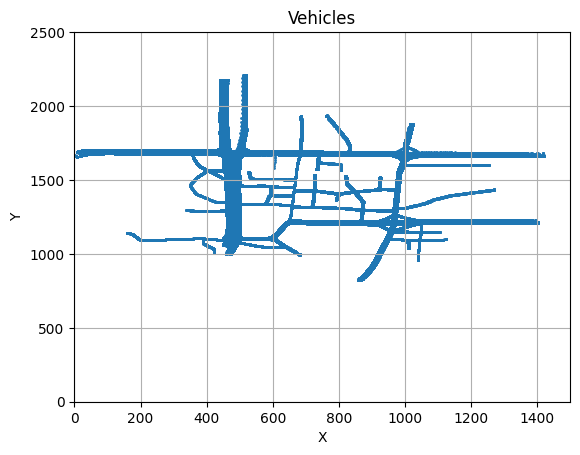

In [ ]:
#Visualizing users across all time steps:
# Create a scatter plot of the vehicles
X_LIM = 1500
Y_LIM = 2500

plt.scatter(data['x'], data['y'], s=1)  # s parameter is used to make the points smaller

plt.xlim(0, X_LIM)
plt.ylim(0, Y_LIM)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Vehicles')
plt.grid(True)
plt.show()

Now let's place our BSs as the centroids of the classifier!

In [ ]:

# Let's assume these are your fixed BS locations (centroids)
bs_locations = np.array([[200, 1700], [500, 1700], [800, 1700], [1100, 1700], [500, 1300], [800, 1300], [1100, 1300]])

In [ ]:
from sklearn.neighbors import NearestCentroid

# Initialize the NearestCentroid classifier
clf = NearestCentroid()

# Fit the classifier using the BS locations
clf.fit(bs_locations, range(len(bs_locations)))

NearestCentroid()

Now let's classify in each time step! (For loop)

Time taken for clustering at time step 0: 0.0028371810913085938 seconds


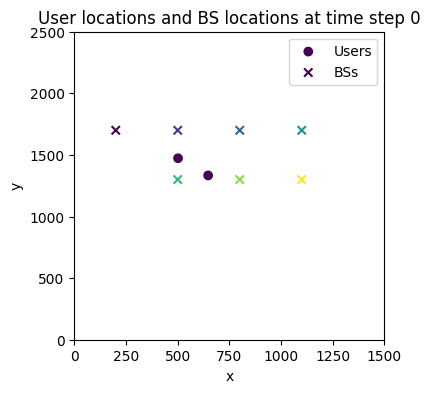

Time taken for clustering at time step 100: 0.0005383491516113281 seconds


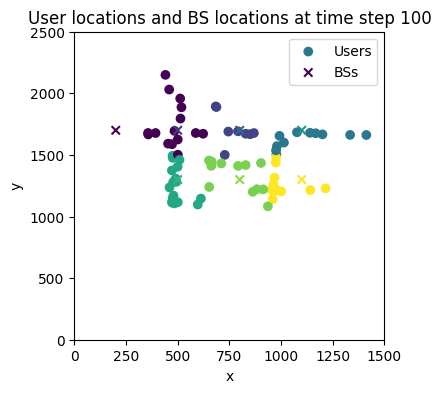

Time taken for clustering at time step 200: 0.0005409717559814453 seconds


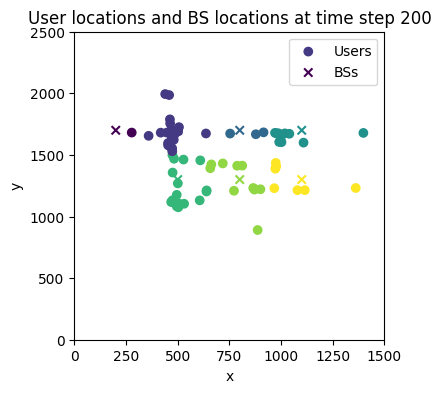

Time taken for clustering at time step 300: 0.0005233287811279297 seconds


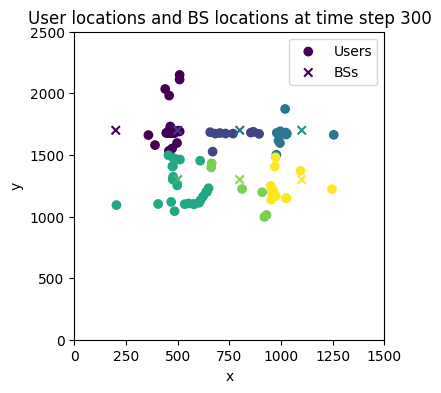

Time taken for clustering at time step 400: 0.0005424022674560547 seconds


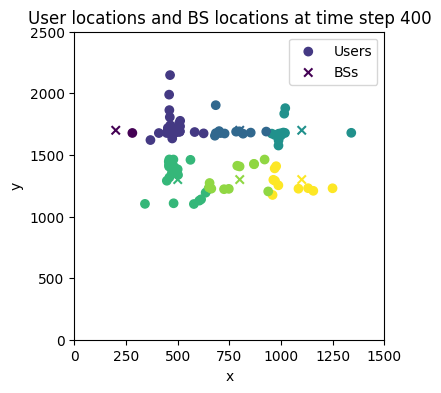

Time taken for clustering at time step 500: 0.0005402565002441406 seconds


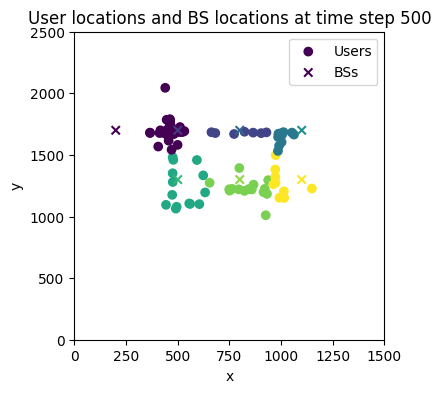

Time taken for clustering at time step 600: 0.00054931640625 seconds


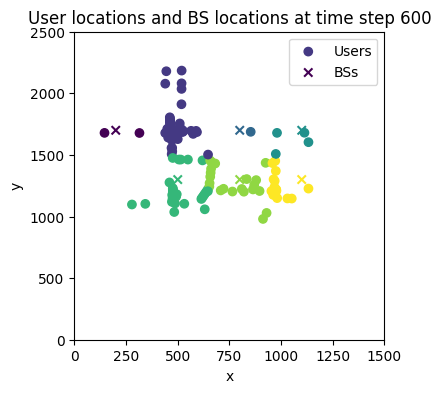

Time taken for clustering at time step 700: 0.0005218982696533203 seconds


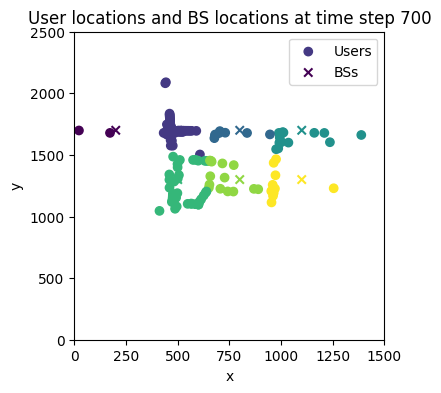

Time taken for clustering at time step 800: 0.0007755756378173828 seconds


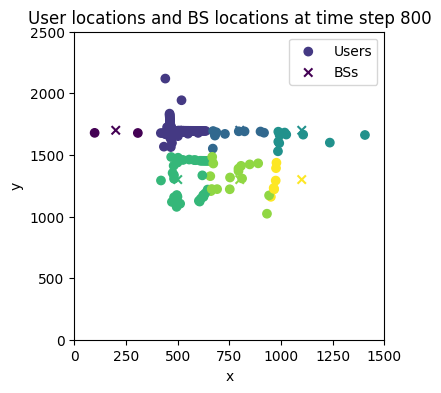

Time taken for clustering at time step 900: 0.0005030632019042969 seconds


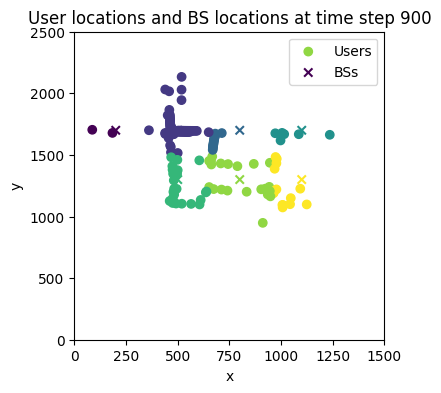

Time taken for clustering at time step 1000: 0.0007686614990234375 seconds


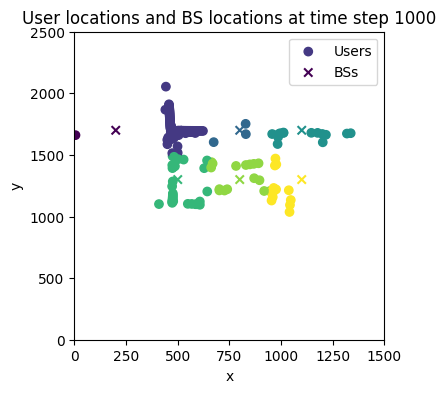

Time taken for clustering at time step 1100: 0.0005815029144287109 seconds


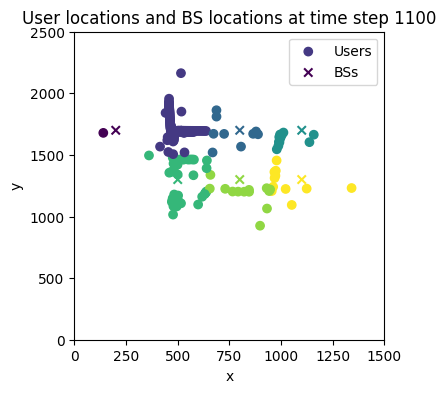

Time taken for clustering at time step 1200: 0.0006175041198730469 seconds


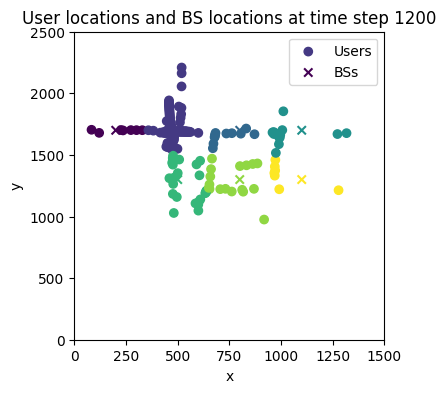

Time taken for clustering at time step 1300: 0.0004935264587402344 seconds


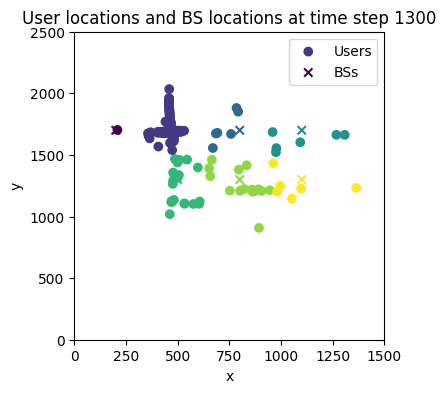

Time taken for clustering at time step 1400: 0.0007410049438476562 seconds


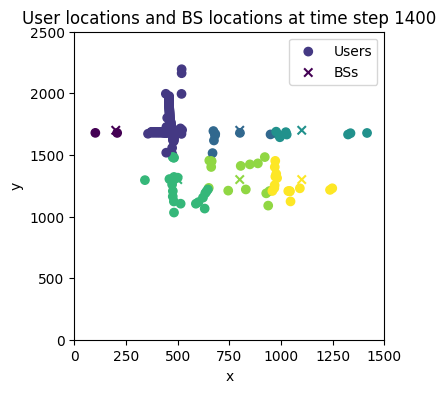

Time taken for clustering at time step 1500: 0.0007860660552978516 seconds


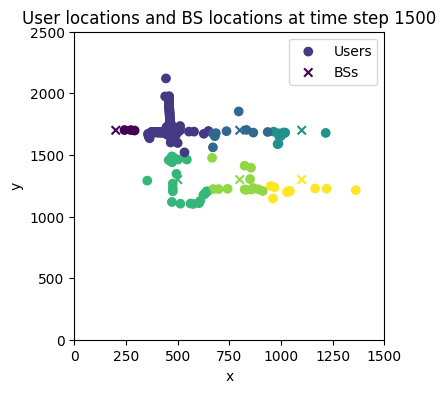

Time taken for clustering at time step 1600: 0.0009570121765136719 seconds


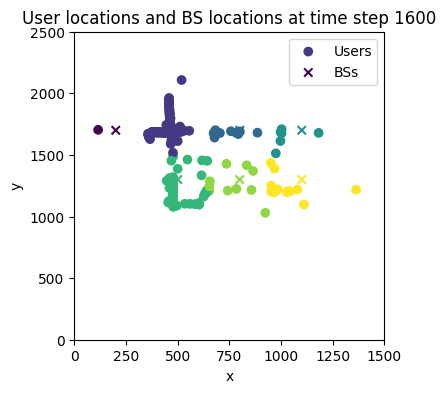

Time taken for clustering at time step 1700: 0.0008232593536376953 seconds


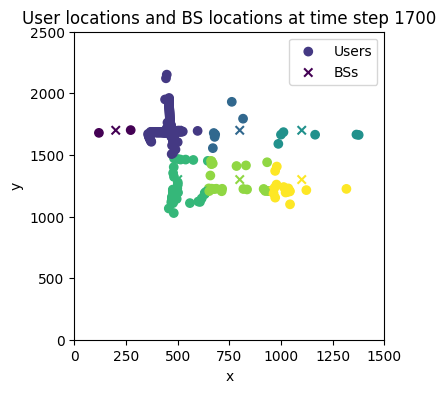

Time taken for clustering at time step 1800: 0.0008652210235595703 seconds


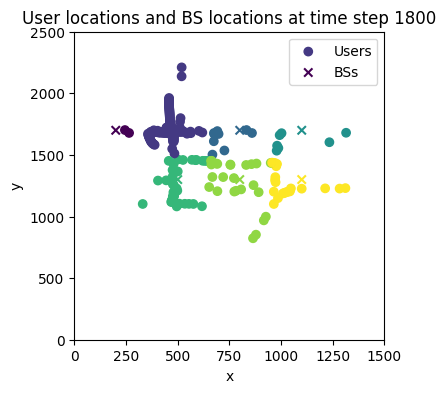

Time taken for clustering at time step 1900: 0.0009272098541259766 seconds


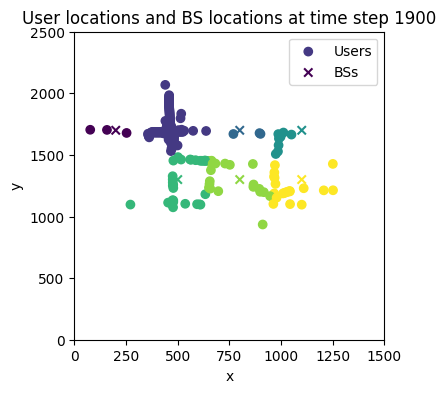

Time taken for clustering at time step 2000: 0.0012917518615722656 seconds


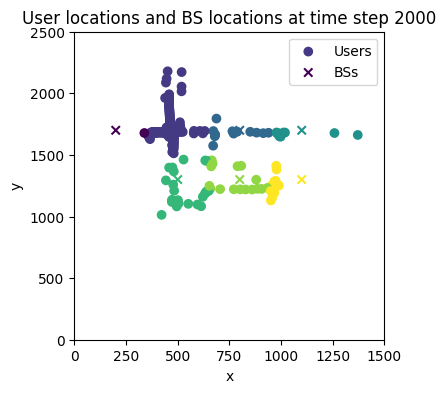

Time taken for clustering at time step 2100: 0.0009379386901855469 seconds


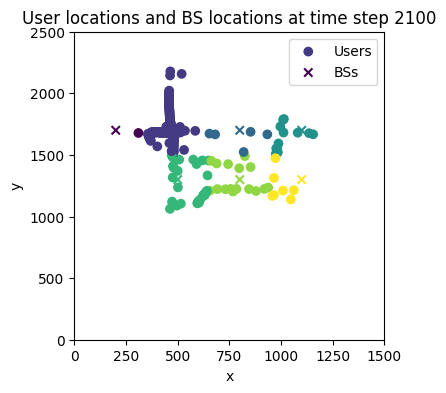

KeyboardInterrupt: 

In [ ]:
import time


# Get the unique time steps
time_steps = data['time'].unique() #.astype(int)

#Let's do it first for 10 time steps:
#time_steps= range(10)
proc_time = np.zeros(len(time_steps))
# For each time step
for t in time_steps:
    # Get the user locations at this time step
    user_locations = data[data['time'] == t][['x', 'y']].values

    # Start the timer
    start_time = time.time()

    # Cluster the users to the nearest BS
    nearest_bs = clf.predict(user_locations)

    # Stop the timer
    end_time = time.time()
    proc_time[t] = end_time - start_time

    if t%100==0:
        # Print the time taken for clustering at this time step
        print(f"Time taken for clustering at time step {t}: {proc_time[t]} seconds")

        # Plot the user locations and BS locations at this time step
        plt.figure(figsize=(4, 4))
        plt.xlim(0, X_LIM)
        plt.ylim(0, Y_LIM)
        plt.scatter(user_locations[:, 0], user_locations[:, 1], c=nearest_bs, marker='o', label='Users')
        plt.scatter(bs_locations[:, 0], bs_locations[:, 1], c=range(len(bs_locations)), marker='x', label='BSs')
        plt.title(f"User locations and BS locations at time step {t}")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.show()

print(np.sum(proc_time))

In [ ]:
# Compute the distances of users to their assigned BS
distances = np.sqrt(np.sum((user_locations - bs_locations[nearest_bs])**2, axis=1))

# Compute the average distance
average_distance = np.mean(distances)

print(f"Average distance of users to their assigned BS at time step {t}: {average_distance}")

Average distance of users to their assigned BS at time step 8219: 473.33014609255565


Now let's evaluate fuzzy clustering:

Fuzzy C-Means algorithm

In [ ]:
!pip install -U scikit-fuzzy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894077 sha256=3785d690173018df71dae118c8280f9ce1f8e0656c617927ff5c126c02704c44
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [ ]:
# Train/test

import skfuzzy as fuzz
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Get the unique time steps
time_steps = data['time'].unique()

# Split the time steps into a training set and a test set
train_time_steps, test_time_steps = train_test_split(time_steps, test_size=0.2, random_state=42)
bs_locations = np.array([[200, 1700], [500, 1700], [800, 1700], [1100, 1700], [500, 1300], [800, 1300], [1100, 1300]])

def compute_accuracy(time_steps, is_train):
    # Create an array to store the processing time for each time step
    proc_time = np.zeros(len(time_steps))

    # Create an array to store the accuracy score for each time step
    accuracy_scores = np.zeros(len(time_steps))

    # For each time step
    for i, t in enumerate(time_steps):
        # Get the user locations at this time step
        user_locations = data[data['time'] == t][['x', 'y']].values

        # Apply the FCM algorithm
        cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(user_locations.T, bs_locations.shape[0], 2, error=0.005, maxiter=1000)

        # Compute the assignments based on the FCM algorithm
        fcm_assignments = np.argmax(u, axis=0)

        # Compute the Euclidean distances
        distances = np.sqrt(np.sum((user_locations[:, np.newaxis] - bs_locations[np.newaxis, :])**2, axis=1))

        # Compute the assignments based on the Euclidean distances
        euclidean_assignments = np.argmin(distances, axis=1)

        # Compute the accuracy
        accuracy = accuracy_score(euclidean_assignments, fcm_assignments)

        # Store the accuracy score for this time step
        accuracy_scores[i] = accuracy
        if t%4000==0:
            print(f"Accuracy at time step {t}: {accuracy}")

    print(f"Average accuracy score for {'training' if is_train else 'test'} set: {np.mean(accuracy_scores)}")

# Compute the accuracy for the training set
compute_accuracy(train_time_steps, True)

# Compute the accuracy for the test set
compute_accuracy(test_time_steps, False)



Accuracy at time step 0: 0.0
Accuracy at time step 8000: 0.12
Accuracy at time step 4000: 0.10622710622710622
Average accuracy score for training set: 0.1428176405400744
Average accuracy score for test set: 0.14638893344749435


I’m using the fuzz.cluster.cmeans function from the scikit-fuzzy library to apply the Fuzzy C-Means algorithm to the user locations at each time step. The u output of this function is a matrix of membership grades, where u[i, j] is the membership grade of user j in BS i. I’m using the argmax function to find the BS with the highest membership grade for each user, and I’m using these as the colors in the scatter plot.

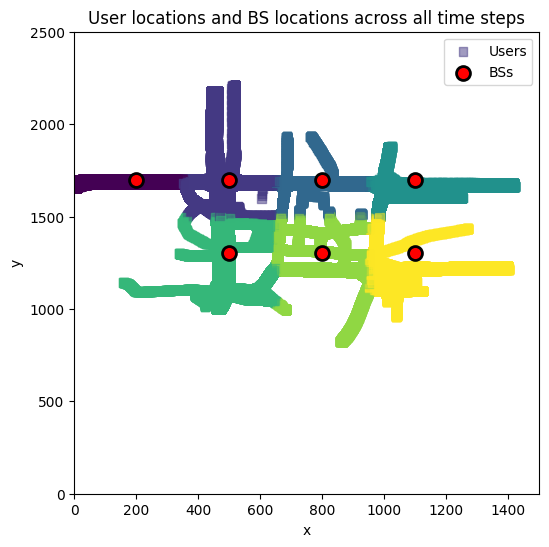

Average accuracy score for training set: 0.9999991911269867
Total processing time for training set: 4.640385389328003


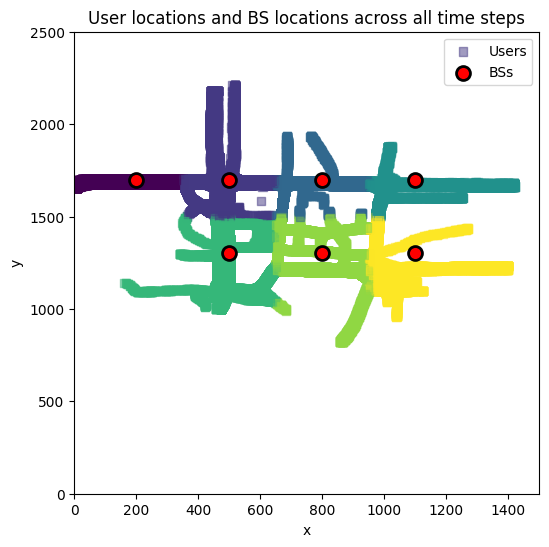

Average accuracy score for test set: 1.0
Total processing time for test set: 1.0644407272338867


In [ ]:
from sklearn.neighbors import NearestCentroid
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score
import time
import matplotlib.pyplot as plt

# Get the unique time steps
time_steps = data['time'].unique()

# Split the time steps into a training set and a test set
train_time_steps, test_time_steps = train_test_split(time_steps, test_size=0.2, random_state=42)

bs_locations = np.array([[200, 1700], [500, 1700], [800, 1700], [1100, 1700], [500, 1300], [800, 1300], [1100, 1300]])

# Initialize the NearestCentroid classifier
clf = NearestCentroid()

# Fit the classifier using the BS locations
clf.fit(bs_locations, range(len(bs_locations)))

# Define a function to compute the accuracy for a set of time steps
def compute_accuracy(time_steps, is_train):
    # Create an array to store the processing time for each time step
    proc_time = np.zeros(len(time_steps))

    # Create an array to store the accuracy score for each time step
    accuracy_scores = np.zeros(len(time_steps))

    # Create lists to store all user locations and their corresponding nearest BS
    all_user_locations = []
    all_nearest_bs = []

    # For each time step
    for i, t in enumerate(time_steps):
        # Get the user locations at this time step
        user_locations = data[data['time'] == t][['x', 'y']].values

        # Start the timer
        start_time = time.time()

        # Cluster the users to the nearest BS
        nearest_bs = clf.predict(user_locations)

        # Stop the timer
        end_time = time.time()

        # Store the time taken for clustering at this time step
        proc_time[i] = end_time - start_time

        # Compute the Euclidean distances
        distances = np.sqrt(np.sum((user_locations[:, np.newaxis, :] - bs_locations[np.newaxis, :, :])**2, axis=2))

        # Compute the assignments based on the Euclidean distances
        euclidean_assignments = np.argmin(distances, axis=1)

        # Compute the accuracy
        accuracy = accuracy_score(euclidean_assignments, nearest_bs)

        # Store the accuracy score for this time step
        accuracy_scores[i] = accuracy

        # Store the user locations and their corresponding nearest BS
        all_user_locations.append(user_locations)
        all_nearest_bs.append(nearest_bs)

        # if t%5000==0:
        #     # Print the time taken for clustering at this time step
        #     print(f"Time taken for clustering at time step {t}: {proc_time[i]} seconds")

        #     # Plot the user locations and BS locations at this time step
        #     plt.figure(figsize=(4, 4))
        #     plt.xlim(0, X_LIM)
        #     plt.ylim(0, Y_LIM)
        #     plt.scatter(user_locations[:, 0], user_locations[:, 1], c=nearest_bs, marker='o', label='Users')
        #     plt.scatter(bs_locations[:, 0], bs_locations[:, 1], c=range(len(bs_locations)), marker='x', label='BSs')
        #     plt.title(f"User locations and BS locations at time step {t}")
        #     plt.xlabel('x')
        #     plt.ylabel('y')
        #     plt.legend()
        #     plt.show()

    # Convert the lists to numpy arrays
    all_user_locations = np.concatenate(all_user_locations)
    all_nearest_bs = np.concatenate(all_nearest_bs)

    # Plot all user locations and their corresponding nearest BS
    plt.figure(figsize=(6, 6))
    plt.xlim(0, X_LIM)
    plt.ylim(0, Y_LIM)
    # Plot the user locations with smaller, semi-transparent markers
    plt.scatter(all_user_locations[:, 0], all_user_locations[:, 1], c=all_nearest_bs, marker=',', alpha=0.5, label='Users')

    # Plot the BS locations with larger, solid markers
    plt.scatter(bs_locations[:, 0], bs_locations[:, 1], c='red', s=100, edgecolors='black', linewidths=2, marker='o', label='BSs')
    plt.title("User locations and BS locations across all time steps")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

    print(f"Average accuracy score for {'training' if is_train else 'test'} set: {np.mean(accuracy_scores)}")
    print(f"Total processing time for {'training' if is_train else 'test'} set: {np.sum(proc_time)}")
# Compute the accuracy for the training set
compute_accuracy(train_time_steps, True)

# Compute the accuracy for the test set
compute_accuracy(test_time_steps, False)
